# Here I want to merge together the data from different sources
# TODO prio
### TODO Here i reduce all the rnaseq data! Check if thats right. Its already bit strange that there are that many duplicate subjects within the data
## find algorithm to make microarray and RNAseq data more comparable (OR. only use one of the techniques but increase data amount)
## merge COVID dataset from wimmers
## create gamlss models for the merged datasets

# TODO less
## impute mean value to nans
## calc percentage of nan per gene. 
## drop biomarkers for values with Nan


In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from utils.helper import manhattanplot, violinplot_overall, scatter_plot, get_negative_values, METADATA_COLS


## Step 1 10k immu

In [2]:
whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)
print(get_negative_values(whole_blood_common))
whole_blood_common.describe()

/tmp/ipykernel_10011/1801342181.py:1: DtypeWarning: Columns (2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


,age,CEP57L1,M6PR,PNPLA7,SUMO2,CUL7,QDPR,ZCRB1,C2CD2,CENPQ,...,MRPL32,TOMM20,PACSIN1,ZSWIM6,IER3,SERINC5,TMEM59,LRRC57,MOSPD1,LAMP1
count,407.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,43.888845,4.452950,8.657758,4.478278,6.084782,6.473684,6.202849,3.109181,4.443137,2.883659,...,4.567211,4.979567,4.829698,5.447999,4.741305,3.289289,6.656570,4.970983,3.403857,9.670797
std,26.228127,1.716228,1.460584,3.000256,4.960965,2.320492,1.658645,2.368727,1.895533,2.255697,...,3.328596,3.302141,1.817740,3.762252,4.192695,2.877948,3.524078,2.487892,2.621602,1.430160
min,0.500000,1.057662,6.074253,0.031806,0.035563,1.285236,3.225538,0.028292,0.384834,0.000058,...,0.035563,0.001447,1.421971,0.043487,0.027234,0.000522,1.643212,0.821599,0.031236,7.033828
25%,23.200000,3.147077,7.430021,1.694606,0.934707,4.858191,4.931683,0.912481,3.106382,1.076697,...,1.098603,1.214332,3.603167,1.631892,0.072959,0.684340,3.009053,2.862513,1.460373,8.422579
50%,30.000000,4.608803,8.373276,5.094507,8.310336,7.009170,5.983786,3.597566,4.454776,2.622921,...,6.171757,6.152602,4.225215,6.888916,7.295857,2.130585,8.784269,4.359807,2.451836,9.400580
75%,67.000000,5.404898,9.761643,6.759334,11.227717,8.328389,7.058615,4.196827,5.455984,4.070077,...,7.147166,7.708665,5.888038,8.924835,8.539213,5.797128,9.747628,7.373301,5.584225,10.860123
max,90.000000,13.523025,14.134668,13.973525,14.119006,13.443973,13.982756,13.772067,13.601016,13.454412,...,14.112129,14.100279,13.769132,14.117074,14.183886,13.366244,14.161420,13.844721,13.473451,14.169369


In [3]:
pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_ordered_common_cols.csv', index_col=0)
print(pbmc_common.shape)
print(get_negative_values(pbmc_common))
pbmc_common.describe()

/tmp/ipykernel_10011/4270007666.py:1: DtypeWarning: Columns (2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_ordered_common_cols.csv', index_col=0)


(335, 16151)
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


,age,SH3PXD2A,C1orf198,SLC25A19,EEF2K,XIRP2,PAQR6,TAS2R5,VPS72,RAX2,...,NLRP2,TMEM42,HYAL4,ECI2,DLL3,FADS1,PSMA4,HR,GABBR1,PITPNM1
count,176.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,49.129205,8.339354,7.713459,7.792467,8.547010,4.188183,6.284061,4.710661,8.560089,4.637897,...,7.016410,8.193339,3.496208,8.316928,4.449565,8.443571,10.892626,3.996585,8.260519,10.927199
std,21.010989,3.049521,2.206626,2.156409,2.538578,2.327277,1.213623,1.451758,2.889013,2.573794,...,1.776145,2.197676,2.845319,2.881027,1.716916,2.791361,2.441285,1.844912,3.296374,3.206150
min,21.000000,0.830739,0.180946,0.066641,1.281843,0.002623,1.951943,0.267655,1.729421,0.033932,...,2.790945,0.727301,0.000000,0.046657,0.088574,2.173105,3.047925,0.071190,0.192094,2.276908
25%,29.000000,6.752783,6.939812,7.609188,7.077119,2.332417,6.228178,3.733341,6.864111,2.550093,...,6.568471,7.275278,0.135071,7.050622,3.273077,6.544684,8.919381,2.630086,6.404512,9.058645
50%,44.000000,8.130544,7.811156,8.352939,7.972572,3.485746,6.591986,4.605174,7.988842,4.076173,...,7.138197,8.732253,3.451049,7.997604,3.952172,7.537408,10.693468,3.603221,6.827559,9.786566
75%,69.000000,11.113725,9.505701,9.242318,10.889563,6.495027,6.897104,6.385372,11.248946,7.331941,...,8.272826,9.844910,6.586399,10.807563,6.484797,11.249177,13.092861,6.441990,11.435377,13.971916
max,90.000000,12.143604,10.865960,10.020695,11.719988,10.017635,8.587569,7.738973,13.231351,10.128484,...,13.106537,12.461661,9.073139,12.328229,7.964814,12.123387,14.139480,6.916452,12.812524,14.592618


In [19]:
combi_df_all_reduced['METHOD'].unique()

array(['array'], dtype=object)

In [4]:
common_columns = whole_blood_common.columns.intersection(pbmc_common.columns)

combi_df_all = pd.concat([whole_blood_common, pbmc_common], ignore_index=True)
print(combi_df_all.shape)

### Remove possible duplicated subjects and entries with Nan 
#combi_df_all_reduced = combi_df_all.drop_duplicates()
combi_df_all_reduced = combi_df_all.drop_duplicates(subset=['subject_accession'], keep='first')
print(combi_df_all_reduced.shape)
###TODO Here i reduce all the rnaseq data! Check if thats right. Its already bit strange that there are that many duplicate subjects within the data

## drop entries that dont fullfill those min metadata
essential_columns = ['age', 'gender', 'subject_accession']
combi_df_all_reduced = combi_df_all_reduced.dropna(subset=essential_columns, axis=0, how='any')
print(combi_df_all_reduced.shape)



(1095, 16238)
(442, 16238)
(441, 16238)


/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepd

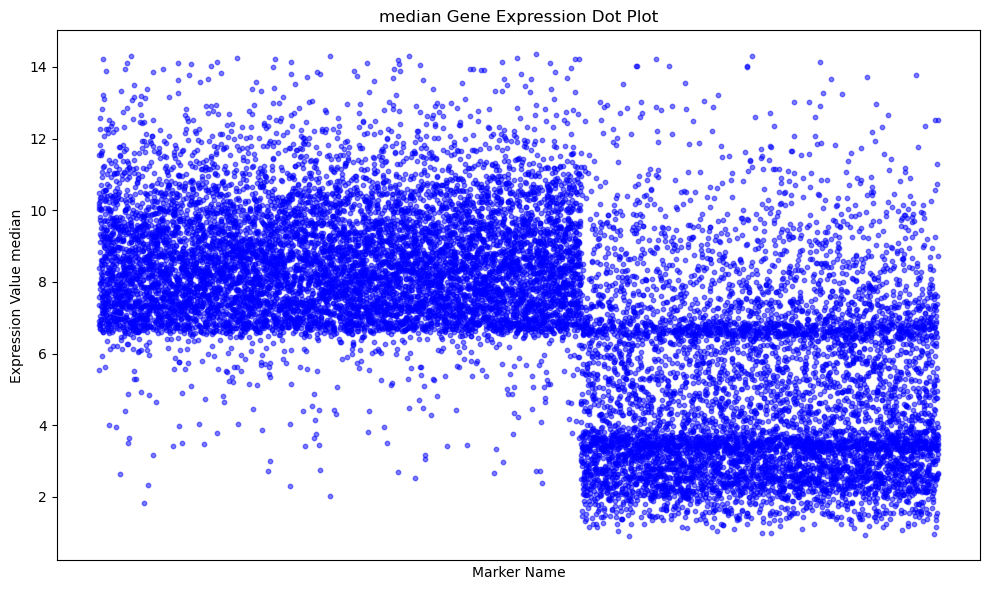

In [5]:
manhattanplot(combi_df_all[combi_df_all['TYPE']=='pbmc'], start_col=9)


In [6]:
combi_df_all_reduced.to_csv('10k_immu/combi_10k_all.csv')

In [7]:
no_meta_cols = list(set(common_columns) - set(METADATA_COLS))
print(len(no_meta_cols))
new_order_cols = METADATA_COLS + no_meta_cols
print(len(new_order_cols))

9232
9241


In [8]:
combi_df_common = combi_df_all_reduced[new_order_cols]
print(combi_df_common.shape)
combi_df_common.to_csv('10k_immu/combi_10k_common.csv')

(441, 9241)


In [9]:
# WHAT ????? negative AND max values that are waaaay too off .... 
# max vals should be MAX 20 (as i log 2 transformed the data)
# no negative min vals 
combi_df_common.describe()

,age,CTH,INSIG1,IFNGR1,PRKD2,FNBP4,ODF2,RAE1,ANAPC11,TIFAB,...,EIF2A,COG5,AZIN1,MAN1A2,TRIM46,HMGN2,CDK18,SLC12A7,CHI3L2,UBE2D3
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,43.550272,4.669569,7.232554,9.868172,7.936743,8.460434,5.650326,6.775514,6.951045,4.652509,...,7.973650,6.208014,7.477132,5.623863,5.895941,8.183130,5.177156,6.329282,6.032353,8.978034
std,24.892882,2.155827,1.941775,1.557387,1.669226,2.051467,1.962131,2.473091,2.526340,2.133135,...,2.011366,1.977156,1.882367,2.007075,1.983330,2.577414,2.250359,2.318984,2.035510,1.912515
min,0.500000,0.127731,0.220656,1.522421,4.394826,1.762415,1.531429,1.482902,1.544452,0.235441,...,1.316264,0.286447,1.873309,1.601882,1.241695,1.323641,0.664128,0.874596,1.208924,3.142522
25%,24.300000,3.323031,6.467335,9.258020,7.052329,7.599615,4.597340,5.399688,5.281366,3.362747,...,6.488360,5.392588,6.562106,4.514506,4.600823,6.558265,3.772524,5.828392,5.258809,7.317275
50%,34.000000,4.061780,7.403481,10.096876,7.989613,8.594070,5.612727,6.915156,7.084144,4.047450,...,7.977089,6.518698,7.748409,5.341826,6.361099,8.669985,5.453465,6.648989,6.520283,9.256482
75%,66.640000,6.578592,8.404936,10.621377,8.974402,9.599302,6.892980,8.478456,8.998124,6.547530,...,9.582776,7.145064,8.410955,6.739180,6.888926,9.888581,6.508941,7.434274,7.086970,10.530069
max,90.000000,13.495920,14.124737,14.182978,13.904557,14.140803,13.719083,13.854693,13.771191,12.716357,...,14.122628,13.698627,13.908983,13.487271,13.591217,13.932709,13.395123,13.213957,13.383122,13.760301


In [10]:
combi_df_common.head()

,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,CTH,...,EIF2A,COG5,AZIN1,MAN1A2,TRIM46,HMGN2,CDK18,SLC12A7,CHI3L2,UBE2D3
0,63.9,SDY111,male,SUB116437,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300358,6.507238,...,7.599972,6.655208,6.693193,6.710508,6.599266,7.437520,6.512863,6.518374,6.571684,7.741262
2,64.2,SDY111,female,SUB116438,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300371,6.631282,...,7.151194,6.564703,6.781074,6.609287,6.528429,7.242422,6.474464,6.483069,6.548449,7.672600
4,68.9,SDY111,female,SUB116439,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300374,6.535945,...,7.044518,6.539226,6.711232,6.538647,6.673387,7.026523,6.498569,6.504201,6.483095,8.004938
6,70.0,SDY111,male,SUB116440,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300362,6.518692,...,7.096977,6.456497,6.842156,6.650355,6.757943,7.128681,6.471063,6.412503,6.608725,8.051199
8,66.1,SDY111,male,SUB116441,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300359,6.507093,...,7.193100,6.477402,6.723724,6.669163,6.684961,7.199589,6.459271,6.510548,6.522911,8.023839


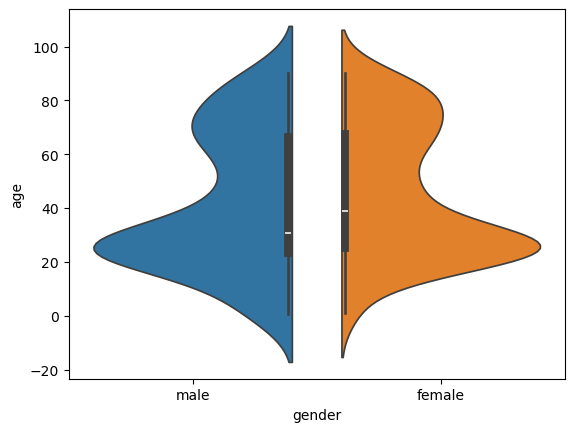

In [11]:
violinplot_overall(combi_df_common, x_topic='gender', y_topic='age', hue_split='gender', bin_name='10k_immu')

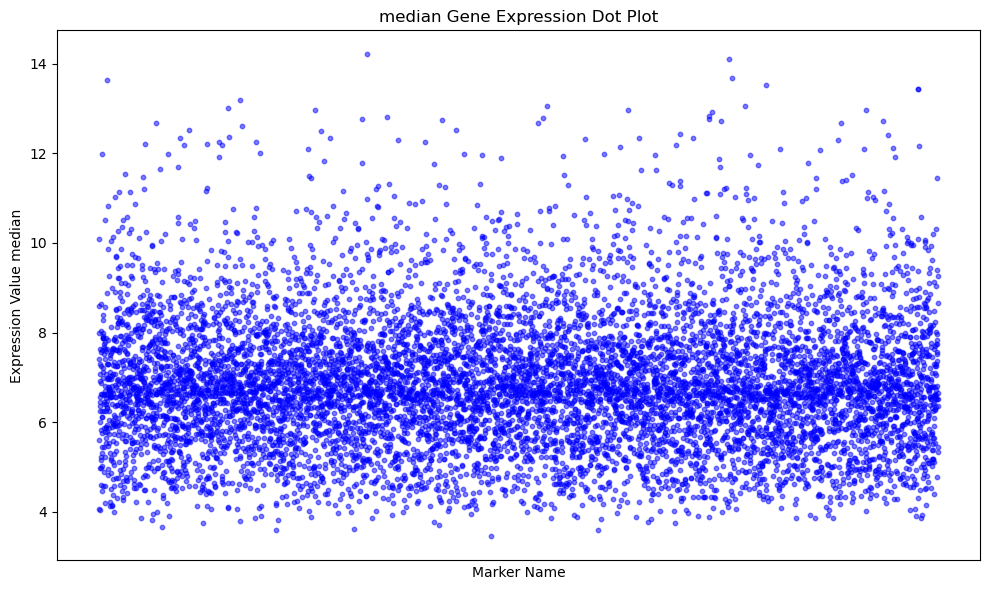

In [12]:
manhattanplot(combi_df_common, start_col=9, save_name='10k_immu/combi_10k_common')
### The plot looks okay, because the median per gene is probably corrected by the increased number of subjects

In [15]:
combi_df_common['METHOD'].unique()

array(['array'], dtype=object)

In [13]:
manhattanplot(combi_df_common[combi_df_common['METHOD']=='rnaseq'], start_col=9)


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1000x600 with 1 Axes>

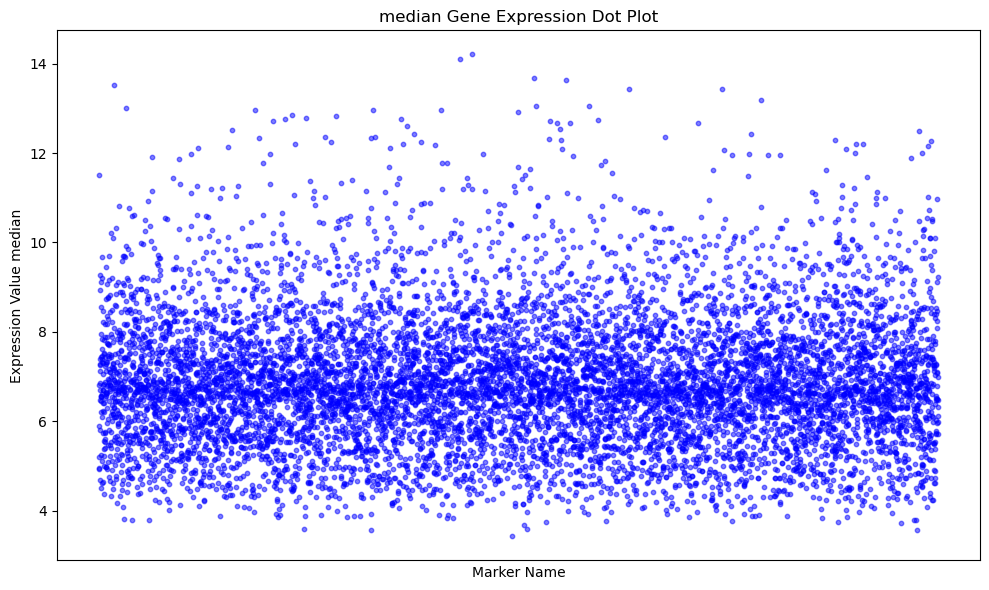

In [ ]:
manhattanplot(combi_df_common[combi_df_common['METHOD']=='array'], start_col=9)


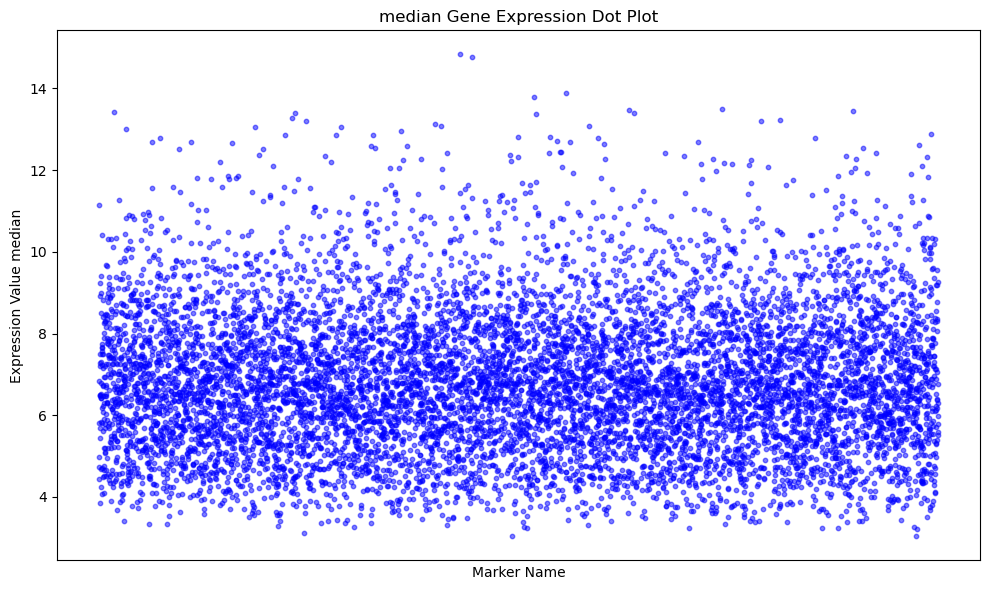

In [ ]:
manhattanplot(combi_df_common[combi_df_common['TYPE']=='whole_blood'], start_col=9)


In [ ]:
print(combi_df_common[combi_df_common['TYPE']=='pbmc'].shape)


(324, 9241)


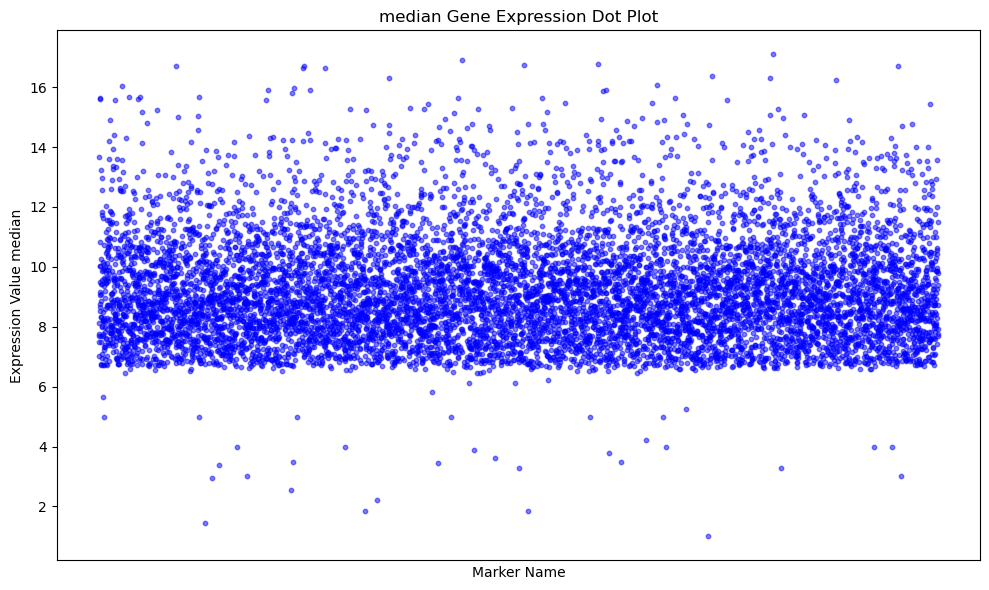

In [ ]:
manhattanplot(combi_df_common[combi_df_common['TYPE']=='pbmc'], start_col=9)


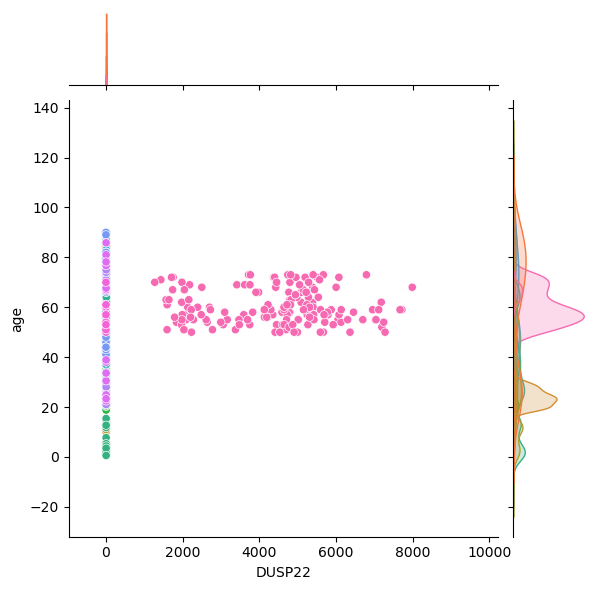

In [ ]:
def scatter_plot(df, x_ID='DUSP22', y_ID='age', hue_ID='study_accession'):
    plot = sns.jointplot(x=x_ID, y=y_ID, data=df, kind='scatter', hue=hue_ID)
    
    plot.ax_joint.legend_.remove()

    #plot.ax_joint.scatter(df[x_ID], df[y_ID], c=df['study_accession'])
    plt.xlabel(f'{x_ID}')
    plt.ylabel(f'{y_ID}')
   # plt.title(f'{x_ID} - {y_ID}')
    plt.show()
    
scatter_plot(combi_df_common)